## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 1.2868 - acc: 0.6966 - val_loss: 0.8119 - val_acc: 0.8311
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.7144 - acc: 0.8423 - val_loss: 0.6057 - val_acc: 0.8637
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5852 - acc: 0.8610 - val_loss: 0.5241 - val_acc: 0.8768
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5237 - acc: 0.8702 - val_loss: 0.4788 - val_acc: 0.8812
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4864 - acc: 0.8755 - val_loss: 0.4492 - val_acc: 0.8865
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4608 - acc: 0.8806 - val_loss: 0.4279 - val_acc: 0.8892
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0

Test score: 0.3353494237542152
Test accuracy: 0.9096


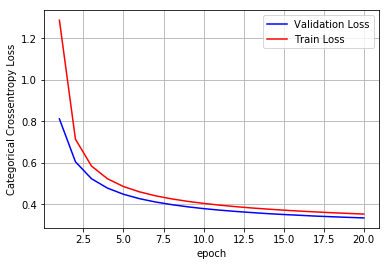

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2685 - acc: 0.2300 - val_loss: 2.2182 - val_acc: 0.3763
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 2.1721 - acc: 0.4916 - val_loss: 2.1137 - val_acc: 0.5823
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 2.0489 - acc: 0.6020 - val_loss: 1.9640 - val_acc: 0.6730
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 1.8737 - acc: 0.6509 - val_loss: 1.7565 - val_acc: 0.6872
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 1.6471 - acc: 0.6826 - val_loss: 1.5122 - val_acc: 0.7098
Epoch 6/20
60000/60000 [==============================] - 1s 25us/step - loss: 1.4073 - acc: 0.7144 - val_loss: 1.2809 - val_acc: 0.7449
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.2003 - acc: 0.7433 - val_loss: 1.0984 - val_acc

Test score: 0.46232331347465516
Test accuracy: 0.8757


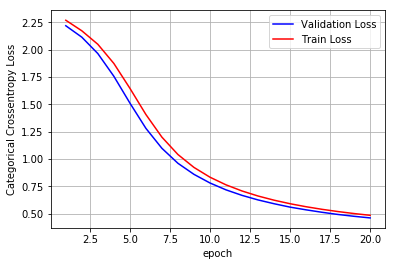

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

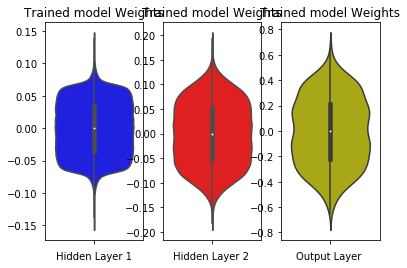

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.5334 - acc: 0.8619 - val_loss: 0.2496 - val_acc: 0.9278
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2203 - acc: 0.9351 - val_loss: 0.1807 - val_acc: 0.9460
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - los

Test score: 0.070374717502352
Test accuracy: 0.981


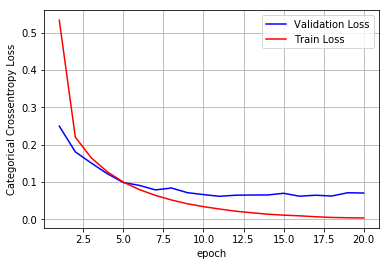

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

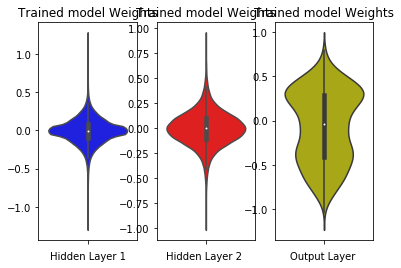

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.7408 - acc: 0.7957 - val_loss: 0.3845 - val_acc: 0.8966
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.3534 - acc: 0.9012 - val_loss: 0.2957 - val_acc: 0.9164
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2907 - acc: 0.9180 - val_loss: 0.2596 - val_acc: 0.9264
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2562 - acc: 0.9274 - val_loss: 0.2344 - val_acc: 0.9337
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2321 - acc: 0.9346 - val_loss: 0.2163 - val_acc: 0.9378
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2136 - acc: 0.9399 - val_loss: 0.2034 - val_acc: 0.9419
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1985 - acc: 0.9437 - val_loss: 0.1918 - val_acc

Test score: 0.12178168601728975
Test accuracy: 0.9642


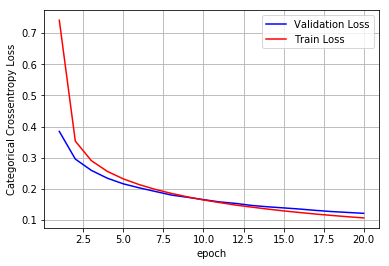

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

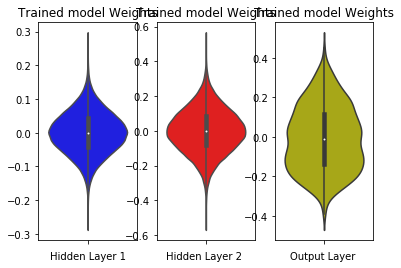

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2247 - acc: 0.9332 - val_loss: 0.1058 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0854 - acc: 0.9739 - val_loss: 0.0787 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step 

Test score: 0.1048071007340337
Test accuracy: 0.9813


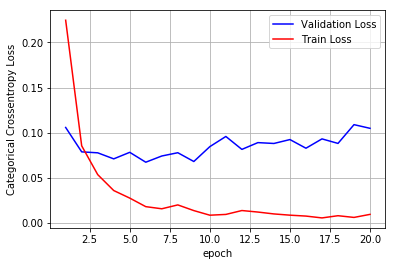

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

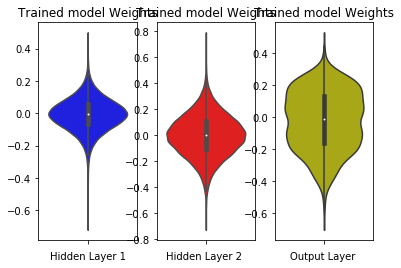

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3045 - acc: 0.9090 - val_loss: 0.2100 - val_acc: 0.9385
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1758 - acc: 0.9483 - val_loss: 0.1736 - val_acc: 0.9506
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1361 - acc: 0.9598 - val_loss: 0.1513 - val_acc: 0.9559
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1134 - acc: 0.9663 - val_loss: 0.1404 - val_acc: 0.9573
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0954 - acc: 0.9714 - val_loss: 0.1308 - val_acc: 0.9632
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0829 - acc: 0.9748 - val_loss: 0.1236 - val_acc: 0.9622
Epoch 7/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0700 - acc: 0.9782 - val_loss: 0.1179 - val_acc

Test score: 0.103441079107736
Test accuracy: 0.9737


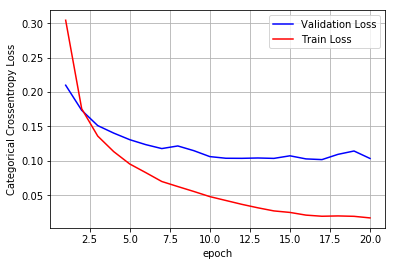

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

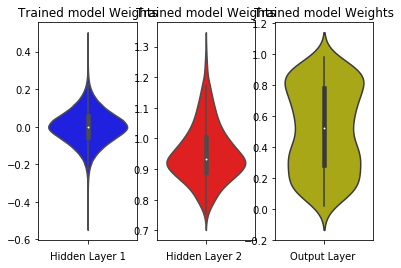

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.6685 - acc: 0.7944 - val_loss: 0.2870 - val_acc: 0.9145
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4305 - acc: 0.8691 - val_loss: 0.2496 - val_acc: 0.9259
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3847 - acc: 0.8830 - val_loss: 0.2332 - val_acc: 0.9327
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3583 - acc: 0.8916 - val_loss: 0.2198 - val_acc: 0.9365
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3364 - acc: 0.8997 - val_loss: 0.2162 - val_acc: 0.9368
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3231 - acc: 0.9019 - val_loss: 0.2004 - val_acc: 0.9414
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3071 - acc: 0.9073 - val_loss: 0.1951 - val_acc

Test score: 0.10681038181651384
Test accuracy: 0.9692


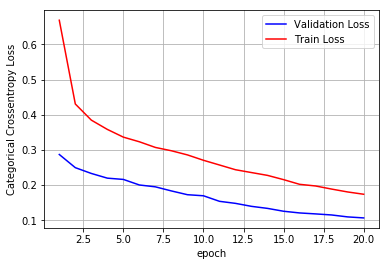

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

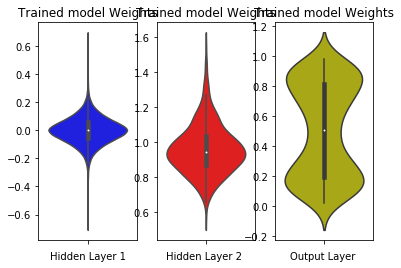

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975683 using {'activ': 'relu'}
0.975583 (0.001635) with: {'activ': 'sigmoid'}
0.975683 (0.002856) with: {'activ': 'relu'}


## MLP (2-3-5 hidden layers)+ BatchNormalization + RELU & Adam

### 2 layer MLP

In [41]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_assign1 = Sequential()

model_assign1.add(Dense(384, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_assign1.add(BatchNormalization())

model_assign1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_assign1.add(BatchNormalization())

model_assign1.add(Dense(output_dim, activation='softmax'))


model_assign1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 384)               301440    
_________________________________________________________________
batch_normalization_5 (Batch (None, 384)               1536      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               49280     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1290      
Total params: 354,058
Trainable params: 353,034
Non-trainable params: 1,024
_________________________________________________________________


In [42]:
model_assign1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model_assign1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2033 - acc: 0.9407 - val_loss: 0.1081 - val_acc: 0.9691
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0783 - acc: 0.9771 - val_loss: 0.0992 - val_acc: 0.9682
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0499 - acc: 0.9847 - val_loss: 0.0821 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0360 - acc: 0.9890 - val_loss: 0.0704 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0273 - acc: 0.9917 - val_loss: 0.0685 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0205 - acc: 0.9939 - val_loss: 0.0733 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0183 - acc: 0.9943 - val_loss: 0.0698 - val_acc

Test score: 0.06508489191211338
Test accuracy: 0.9833
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


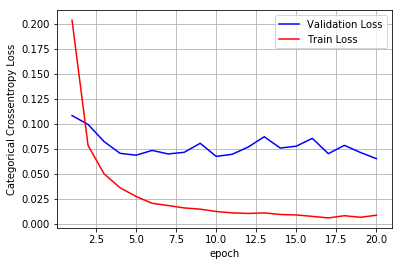

In [43]:
score = model_assign1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history1.history.keys())

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)

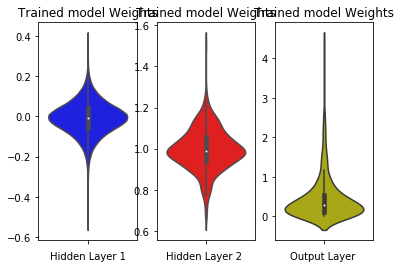

In [44]:
w_after = model_assign1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

When we reduce the number of neurons for first layer we can see that result is not good, We can see that train loss is significantly less but the CV loss is high so it seems the model is overfit


### 3 Layers

In [50]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_assign2 = Sequential()

model_assign2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_assign2.add(BatchNormalization())

model_assign2.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_assign2.add(BatchNormalization())

model_assign2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.45, seed=None)) )
model_assign2.add(BatchNormalization())

model_assign2.add(Dense(output_dim, activation='softmax'))


model_assign2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total para

In [51]:
model_assign2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2028 - acc: 0.9409 - val_loss: 0.1153 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0726 - acc: 0.9778 - val_loss: 0.0933 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0472 - acc: 0.9853 - val_loss: 0.0876 - val_acc: 0.9715
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0346 - acc: 0.9887 - val_loss: 0.0871 - val_acc: 0.9731
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.0811 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0230 - acc: 0.9923 - val_loss: 0.0792 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0896 - val_acc

Test score: 0.08458298331418318
Test accuracy: 0.9814
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


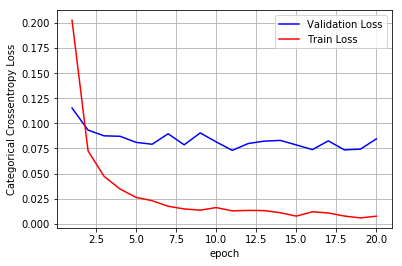

In [52]:
score = model_assign2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

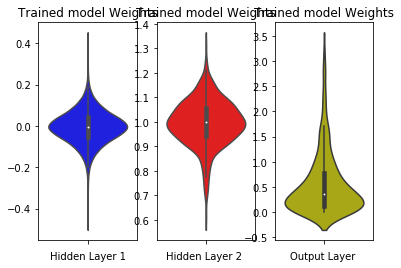

In [53]:
w_after = model_assign2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 Layers

In [54]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_assign3 = Sequential()

model_assign3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_assign3.add(BatchNormalization())

model_assign3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_assign3.add(BatchNormalization())

model_assign3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.45, seed=None)) )
model_assign3.add(BatchNormalization())

model_assign3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.35, seed=None)) )
model_assign3.add(BatchNormalization())

model_assign3.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_assign3.add(BatchNormalization())

model_assign3.add(Dense(output_dim, activation='softmax'))


model_assign3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
__________

In [55]:
model_assign3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_assign3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3020 - acc: 0.9182 - val_loss: 0.1245 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0981 - acc: 0.9709 - val_loss: 0.1130 - val_acc: 0.9652
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.0912 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0470 - acc: 0.9862 - val_loss: 0.0954 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0405 - acc: 0.9873 - val_loss: 0.0818 - val_acc: 0.9756
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0368 - acc: 0.9878 - val_loss: 0.0811 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0288 - acc: 0.9910 - val_loss: 0.0812 - val_ac

Test score: 0.07455887348663964
Test accuracy: 0.9808
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


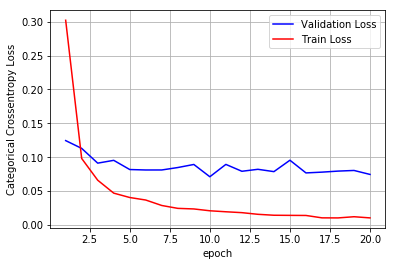

In [56]:
score = model_assign3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

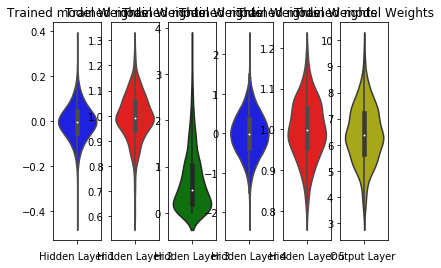

In [60]:
w_after = model_assign3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2 layer MLP with DROPOUT

In [61]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_drop1 = Sequential()

model_drop1.add(Dense(384, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 384)               301440    
_________________________________________________________________
batch_normalization_21 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_3 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               49280     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                1290      
Total para

In [62]:
model_drop1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.5217 - acc: 0.8405 - val_loss: 0.1710 - val_acc: 0.9470
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2722 - acc: 0.9188 - val_loss: 0.1350 - val_acc: 0.9603
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2163 - acc: 0.9358 - val_loss: 0.1150 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1876 - acc: 0.9436 - val_loss: 0.0999 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1702 - acc: 0.9486 - val_loss: 0.0905 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1519 - acc: 0.9536 - val_loss: 0.0849 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1384 - acc: 0.9583 - val_loss: 0.0807 - val_acc

Test score: 0.06196486938249436
Test accuracy: 0.982
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


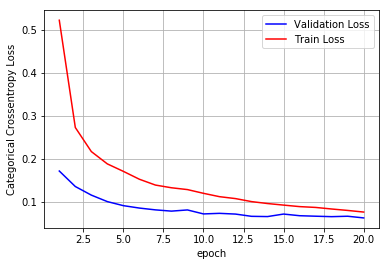

In [63]:
score = model_drop1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

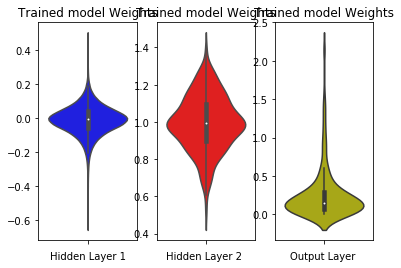

In [64]:
w_after = model_drop1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3 Layers with Dropout

In [65]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_drop2 = Sequential()

model_drop2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.45, seed=None)) )
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(output_dim, activation='softmax'))


model_drop2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
__________

In [66]:
model_drop2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.7711 - acc: 0.7618 - val_loss: 0.2060 - val_acc: 0.9361
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3431 - acc: 0.8977 - val_loss: 0.1532 - val_acc: 0.9529
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2708 - acc: 0.9194 - val_loss: 0.1275 - val_acc: 0.9599
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2288 - acc: 0.9324 - val_loss: 0.1209 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2004 - acc: 0.9416 - val_loss: 0.1022 - val_acc: 0.9696
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1819 - acc: 0.9465 - val_loss: 0.1019 - val_acc: 0.9692
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1693 - acc: 0.9512 - val_loss: 0.0963 - val_ac

Test score: 0.06907582026841701
Test accuracy: 0.9812
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


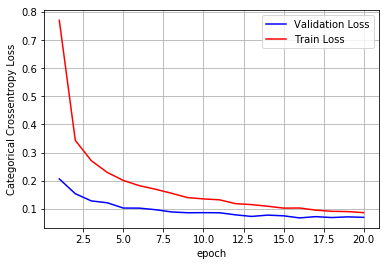

In [67]:
score = model_drop2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

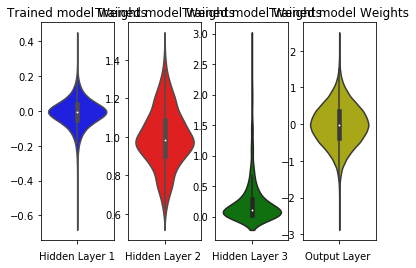

In [68]:
w_after = model_drop2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 5 Layers with Dropout

In [69]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_drop3 = Sequential()

model_drop3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.45, seed=None)) )
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.35, seed=None)) )
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(output_dim, activation='softmax'))


model_drop3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
__________

In [70]:
model_drop3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 1.8856 - acc: 0.3627 - val_loss: 0.7018 - val_acc: 0.8181
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.9700 - acc: 0.6749 - val_loss: 0.3791 - val_acc: 0.8916
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.6757 - acc: 0.7862 - val_loss: 0.2443 - val_acc: 0.9346
Epoch 4/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5219 - acc: 0.8492 - val_loss: 0.1853 - val_acc: 0.9502
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.4321 - acc: 0.8821 - val_loss: 0.1717 - val_acc: 0.9527
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.3766 - acc: 0.9017 - val_loss: 0.1560 - val_acc: 0.9575
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.3308 - acc: 0.9163 - val_loss: 0.1386 - val_a

Test score: 0.09291616351655685
Test accuracy: 0.9784
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


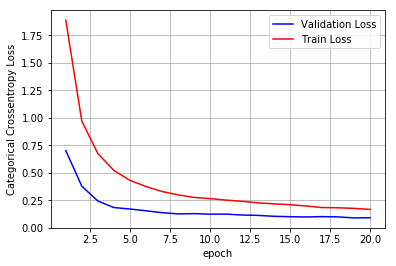

In [71]:
score = model_drop3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

print(history.history.keys())

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

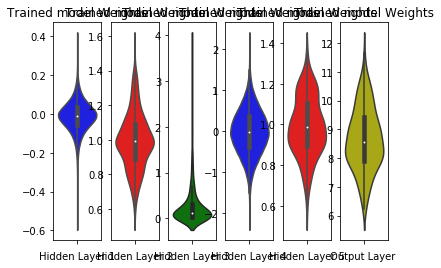

In [72]:
w_after = model_drop3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='b')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### OBSERVATION



In [1]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

names = ["2-layer-without-dropout", "3-layer-without-dropout", "5-layer-without-dropout", "2-layer-with-dropout", "3-layer-with-dropout", "5-layer-with-dropout"]

layers = ['2', '3', '5', '2','3','5']

accuracy = ['98.33', '98.14', '98.08', '98.20' , '98.12' , '97.84']

dropout = ['No', 'No', 'No', 'Yes','Yes','Yes']

optimizer =['Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam']

batch = ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']

numbering = [1,2,3,4,5,6]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
#ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("LAYERS",layers)
ptable.add_column("ACCURACY",accuracy)
ptable.add_column("DROPOUT",dropout)
ptable.add_column("OPTIMIZER",optimizer)
ptable.add_column("BATCHNORMALIZATION",batch)

# Printing the Table
print(ptable)

+-------------------------+--------+----------+---------+-----------+--------------------+
|          MODEL          | LAYERS | ACCURACY | DROPOUT | OPTIMIZER | BATCHNORMALIZATION |
+-------------------------+--------+----------+---------+-----------+--------------------+
| 2-layer-without-dropout |   2    |  98.33   |    No   |    Adam   |        Yes         |
| 3-layer-without-dropout |   3    |  98.14   |    No   |    Adam   |        Yes         |
| 5-layer-without-dropout |   5    |  98.08   |    No   |    Adam   |        Yes         |
|   2-layer-with-dropout  |   2    |  98.20   |   Yes   |    Adam   |        Yes         |
|   3-layer-with-dropout  |   3    |  98.12   |   Yes   |    Adam   |        Yes         |
|   5-layer-with-dropout  |   5    |  97.84   |   Yes   |    Adam   |        Yes         |
+-------------------------+--------+----------+---------+-----------+--------------------+
